In [455]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import datetime as dt
pd.options.display.float_format = "{:.2f}".format 


In [456]:
customer = pd.read_csv(r"C:\Users\ACER\OneDrive\Desktop\Python Foundation End to End Case Study E-Commerce Analytics Project\CUSTOMERS.csv")

geo_location = pd.read_csv (r"C:\Users\ACER\OneDrive\Desktop\Python Foundation End to End Case Study E-Commerce Analytics Project\GEO_LOCATION.csv")

order_items = pd.read_csv (r"C:\Users\ACER\OneDrive\Desktop\Python Foundation End to End Case Study E-Commerce Analytics Project\ORDER_ITEMS.csv")

order_payment = pd.read_csv (r"C:\Users\ACER\OneDrive\Desktop\Python Foundation End to End Case Study E-Commerce Analytics Project\ORDER_PAYMENTS.csv")

order_review= pd.read_csv (r"C:\Users\ACER\OneDrive\Desktop\Python Foundation End to End Case Study E-Commerce Analytics Project\ORDER_REVIEW_RATINGS.csv")

order = pd.read_csv (r"C:\Users\ACER\OneDrive\Desktop\Python Foundation End to End Case Study E-Commerce Analytics Project\ORDERS.csv")

product = pd.read_csv (r"C:\Users\ACER\OneDrive\Desktop\Python Foundation End to End Case Study E-Commerce Analytics Project\PRODUCTS.csv")

seller = pd.read_csv (r"C:\Users\ACER\OneDrive\Desktop\Python Foundation End to End Case Study E-Commerce Analytics Project\SELLERS.csv")

In [457]:
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,5/2/2018 4:11,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,7/20/2018 4:31,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,10/30/2017 17:14,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,8/21/2017 0:04,55.99,8.72


In [458]:
order_items_new = order_items.groupby(["order_id","product_id","seller_id"]).agg(order_unit = ("product_id","count"), total_price = ("price",'sum'), total_freight_value = ("freight_value", "sum"))

In [459]:
order_items_new

,,,order_unit,total_price,total_freight_value
order_id,product_id,seller_id,,,
00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,1,58.90,13.29
00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,1,239.90,19.93
000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1,199.00,17.87
00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,1,12.99,12.79
00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,1,199.90,18.14
...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,1,299.99,43.41
fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,1,350.00,36.53
fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,1,99.90,16.95


In [460]:
order_items_new.reset_index(inplace=True)

In [461]:
order_items_new

,order_id,product_id,seller_id,order_unit,total_price,total_freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,1,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,1,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,1,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,1,199.90,18.14
...,...,...,...,...,...,...
102420,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,1,299.99,43.41
102421,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,1,350.00,36.53
102422,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,1,99.90,16.95
102423,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,1,55.99,8.72


In [462]:
order_items_new["unit_price"] =(order_items_new.total_price)/order_items_new.order_unit

In [463]:
order_items_new["unit_freight_value"] =(order_items_new.total_freight_value)/order_items_new.order_unit



In [464]:
order_items_new["total_t_payment"] =((order_items_new.unit_price)*order_items_new.order_unit) +((order_items_new.unit_freight_value)*order_items_new.order_unit)  

In [465]:
## Merging order with order_items without repeted data 

a = pd.merge(how="inner", left=order ,right=order_items_new, on="order_id")

In [466]:
a

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,order_unit,total_price,total_freight_value,unit_price,unit_freight_value,total_t_payment
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,1,29.99,8.72,29.99,8.72,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,1,118.70,22.76,118.70,22.76,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,1,159.90,19.22,159.90,19.22,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,1,45.00,27.20,45.00,27.20,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,1,19.90,8.72,19.90,8.72,28.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102420,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,3/9/2017 9:54,3/9/2017 9:54,3/10/2017 11:18,3/17/2017 15:08,3/28/2017 0:00,ac35486adb7b02598c182c2ff2e05254,e24fc9fcd865784fb25705606fe3dfe7,1,72.00,13.08,72.00,13.08,85.08
102421,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2/6/2018 12:58,2/6/2018 13:10,2/7/2018 23:22,2/28/2018 17:37,3/2/2018 0:00,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,1,174.90,20.10,174.90,20.10,195.00
102422,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,8/27/2017 14:46,8/27/2017 15:04,8/28/2017 20:52,9/21/2017 11:24,9/27/2017 0:00,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,1,205.99,65.02,205.99,65.02,271.01
102423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,1/8/2018 21:28,1/8/2018 21:36,1/12/2018 15:35,1/25/2018 23:32,2/15/2018 0:00,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2,359.98,81.18,179.99,40.59,441.16


In [467]:
## Merging a to order payment data 
b = pd.merge(how="inner", left=a ,right=order_payment, on="order_id")

In [468]:
b

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,order_unit,total_price,total_freight_value,unit_price,unit_freight_value,total_t_payment,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,1,29.99,8.72,29.99,8.72,38.71,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,1,29.99,8.72,29.99,8.72,38.71,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,1,29.99,8.72,29.99,8.72,38.71,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,1,118.70,22.76,118.70,22.76,141.46,1,UPI,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,1,159.90,19.22,159.90,19.22,179.12,1,credit_card,3,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107019,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,3/9/2017 9:54,3/9/2017 9:54,3/10/2017 11:18,3/17/2017 15:08,3/28/2017 0:00,ac35486adb7b02598c182c2ff2e05254,e24fc9fcd865784fb25705606fe3dfe7,1,72.00,13.08,72.00,13.08,85.08,1,credit_card,3,85.08
107020,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2/6/2018 12:58,2/6/2018 13:10,2/7/2018 23:22,2/28/2018 17:37,3/2/2018 0:00,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,1,174.90,20.10,174.90,20.10,195.00,1,credit_card,3,195.00
107021,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,8/27/2017 14:46,8/27/2017 15:04,8/28/2017 20:52,9/21/2017 11:24,9/27/2017 0:00,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,1,205.99,65.02,205.99,65.02,271.01,1,credit_card,5,271.01
107022,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,1/8/2018 21:28,1/8/2018 21:36,1/12/2018 15:35,1/25/2018 23:32,2/15/2018 0:00,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2,359.98,81.18,179.99,40.59,441.16,1,credit_card,4,441.16


In [469]:
## Merging b and product data 

In [470]:
c = pd.merge(how="inner", left=b ,right=product, on="product_id")

In [471]:
c

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,...,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,1,18.12,Housewares,40.00,268.00,4.00,500.00,19.00,8.00,13.00
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,1,2.00,Housewares,40.00,268.00,4.00,500.00,19.00,8.00,13.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,1,18.59,Housewares,40.00,268.00,4.00,500.00,19.00,8.00,13.00
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,8/15/2017 18:29,8/15/2017 20:05,8/17/2017 15:28,8/18/2017 14:44,8/28/2017 0:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,3,37.77,Housewares,40.00,268.00,4.00,500.00,19.00,8.00,13.00
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,8/2/2017 18:24,8/2/2017 18:43,8/4/2017 17:35,8/7/2017 18:30,8/15/2017 0:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,1,37.77,Housewares,40.00,268.00,4.00,500.00,19.00,8.00,13.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107019,87b4c933f31145a28413b39d880ad6c3,ddfdf5e9b2659e1fbd073404c9b762e0,delivered,3/2/2018 17:12,3/2/2018 17:49,3/6/2018 21:23,3/16/2018 17:21,3/21/2018 0:00,cbaf5898b92064cd5e399c7cff291d0a,06a2c3af7b3aee5d69171b0e14f0ee87,...,1,85.25,Health_Beauty,50.00,1031.00,1.00,350.00,19.00,12.00,13.00
107020,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,8/10/2017 21:21,8/10/2017 21:35,8/18/2017 16:42,8/23/2017 15:36,8/31/2017 0:00,0df37da38a30a713453b03053d60d3f7,218d46b86c1881d022bce9c68a7d4b15,...,10,748.24,Sports_Leisure,53.00,1105.00,1.00,2800.00,28.00,23.00,23.00
107021,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,12/20/2017 9:52,12/20/2017 10:09,12/20/2017 20:25,1/26/2018 15:45,1/18/2018 0:00,3d2c44374ee42b3003a470f3e937a2ea,ce248b21cb2adc36282ede306b7660e5,...,1,71.04,Musical_Instruments,34.00,372.00,2.00,300.00,16.00,6.00,12.00
107022,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,3/9/2017 9:54,3/9/2017 9:54,3/10/2017 11:18,3/17/2017 15:08,3/28/2017 0:00,ac35486adb7b02598c182c2ff2e05254,e24fc9fcd865784fb25705606fe3dfe7,...,3,85.08,Health_Beauty,50.00,1517.00,1.00,1175.00,22.00,13.00,18.00


In [472]:
## As you can see that for a single order there are 3 order and 3 reviews for a single product 
##so we need to extract on 1 review for single order. 

In [473]:
order_review[order_review.order_id=="8e17072ec97ce29f0e1f111e598b0c85"]

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
45043,67c2557eb0bd72e3ece1e03477c9dff5,8e17072ec97ce29f0e1f111e598b0c85,1,4/7/2018 0:00,4/8/2018 22:48
65024,2d6ac45f859465b5c185274a1c929637,8e17072ec97ce29f0e1f111e598b0c85,1,4/7/2018 0:00,4/7/2018 21:13
93027,6e4c4086d9611ae4cc0cc65a262751fe,8e17072ec97ce29f0e1f111e598b0c85,1,4/14/2018 0:00,4/16/2018 11:37


In [474]:
c[c.order_id == "8e17072ec97ce29f0e1f111e598b0c85" ]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,...,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
36785,8e17072ec97ce29f0e1f111e598b0c85,9e29cde4ddb42f9330bcf3c9bc23d177,delivered,3/31/2018 15:08,3/31/2018 15:50,4/3/2018 15:58,4/6/2018 17:38,5/4/2018 0:00,ac20a9614b6db9e7289b85c4f4b6216a,d91fb3b7d041e83b64a00a3edfb37e4f,...,5,59.32,Home_Appliances,59.00,190.00,1.00,1250.00,65.00,8.00,38.00


In [475]:
order_review[order_review.order_id=="c88b1d1b157a9999ce368f218a407141"]


,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
1997,ffb8cff872a625632ac983eb1f88843c,c88b1d1b157a9999ce368f218a407141,3,7/22/2017 0:00,7/26/2017 13:41
83187,202b5f44d09cd3cfc0d6bd12f01b044c,c88b1d1b157a9999ce368f218a407141,5,7/22/2017 0:00,7/26/2017 13:40
90069,fb96ea2ef8cce1c888f4d45c8e22b793,c88b1d1b157a9999ce368f218a407141,5,7/21/2017 0:00,7/26/2017 13:45


In [476]:
c[c.order_id== "c88b1d1b157a9999ce368f218a407141"]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,...,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
29923,c88b1d1b157a9999ce368f218a407141,ae0fb7b01c548c4fd30f19f55453ec4a,delivered,7/17/2017 22:44,7/18/2017 22:50,7/20/2017 15:27,7/21/2017 17:06,8/1/2017 0:00,b1acb7e8152c90c9619897753a75c973,cc419e0650a3c5ba77189a1882b7556a,...,4,42.77,Health_Beauty,56.00,575.00,1.00,200.00,20.00,15.00,15.00


In [477]:
order_review = order_review.iloc[order_review.order_id.drop_duplicates().index]

In [478]:
order_review.order_id.duplicated().any()

False

In [479]:
## merge c with order_review 

In [480]:
d = pd.merge(how="inner", left=c ,right=order_review, on="order_id")

In [481]:
d

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,seller_id,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,268.00,4.00,500.00,19.00,8.00,13.00,a54f0611adc9ed256b57ede6b6eb5114,4,10/11/2017 0:00,10/12/2017 3:43
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,268.00,4.00,500.00,19.00,8.00,13.00,a54f0611adc9ed256b57ede6b6eb5114,4,10/11/2017 0:00,10/12/2017 3:43
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,268.00,4.00,500.00,19.00,8.00,13.00,a54f0611adc9ed256b57ede6b6eb5114,4,10/11/2017 0:00,10/12/2017 3:43
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,8/15/2017 18:29,8/15/2017 20:05,8/17/2017 15:28,8/18/2017 14:44,8/28/2017 0:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,268.00,4.00,500.00,19.00,8.00,13.00,b46f1e34512b0f4c74a72398b03ca788,4,8/19/2017 0:00,8/20/2017 15:16
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,8/2/2017 18:24,8/2/2017 18:43,8/4/2017 17:35,8/7/2017 18:30,8/15/2017 0:00,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,268.00,4.00,500.00,19.00,8.00,13.00,dc90f19c2806f1abba9e72ad3c350073,5,8/8/2017 0:00,8/8/2017 23:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107019,87b4c933f31145a28413b39d880ad6c3,ddfdf5e9b2659e1fbd073404c9b762e0,delivered,3/2/2018 17:12,3/2/2018 17:49,3/6/2018 21:23,3/16/2018 17:21,3/21/2018 0:00,cbaf5898b92064cd5e399c7cff291d0a,06a2c3af7b3aee5d69171b0e14f0ee87,...,1031.00,1.00,350.00,19.00,12.00,13.00,75e56d835fdcc09e60b49c5e5f3e0a16,5,3/17/2018 0:00,3/19/2018 13:11
107020,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,8/10/2017 21:21,8/10/2017 21:35,8/18/2017 16:42,8/23/2017 15:36,8/31/2017 0:00,0df37da38a30a713453b03053d60d3f7,218d46b86c1881d022bce9c68a7d4b15,...,1105.00,1.00,2800.00,28.00,23.00,23.00,f5453b3d33358ed459eb4312392b96a8,4,8/24/2017 0:00,8/25/2017 11:38
107021,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,12/20/2017 9:52,12/20/2017 10:09,12/20/2017 20:25,1/26/2018 15:45,1/18/2018 0:00,3d2c44374ee42b3003a470f3e937a2ea,ce248b21cb2adc36282ede306b7660e5,...,372.00,2.00,300.00,16.00,6.00,12.00,8ea780895f362ce949029f95b7181ff0,1,1/19/2018 0:00,1/21/2018 2:51
107022,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,3/9/2017 9:54,3/9/2017 9:54,3/10/2017 11:18,3/17/2017 15:08,3/28/2017 0:00,ac35486adb7b02598c182c2ff2e05254,e24fc9fcd865784fb25705606fe3dfe7,...,1517.00,1.00,1175.00,22.00,13.00,18.00,e262b3f92d1ce917aa412a9406cf61a6,5,3/22/2017 0:00,3/23/2017 11:02


In [482]:
## Merging d with seller data : 

In [483]:
order_final = pd.merge(how="inner", left=d ,right=seller, on="seller_id")

In [484]:
## Merging customer with geo_location 

In [485]:
e = pd.merge(how="inner", left=customer ,right=geo_location, left_on="customer_zip_code_prefix", right_on="geolocation_zip_code_prefix")

In [486]:
## Merging final data customer and order 

In [487]:
customer_final = pd.merge(how="inner", left=order_final ,right=e , on="customer_id")

In [488]:
final_data = customer_final

## 1. Perform Detailed exploratory analysis

### a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total   categories,Total sellers, Total locations, Total channels, Total payment methods etc…)

In [489]:
## Total revenue 

print("Total Revenue from Sep 2016 to Oct 2018 : ", final_data.total_t_payment.sum())

print("Total different Products ordered : ",final_data.product_id.value_counts().count())

print("Total seller worked from Sep 2016 to Oct 2018: ",final_data.seller_id.value_counts().count())

print("Total customer location - customer_city : ", final_data.customer_city.value_counts().count())

print("Total customer location - customer_state : ", final_data.customer_state.value_counts().count())

print("Total seller location - seller_city : ", final_data.seller_city.value_counts().count())

print("Total seller location - seller_state : ", final_data.seller_state.value_counts().count())

print("Total status of order delivered  : ", final_data.order_status.value_counts()[0])

print("Total status of order canceled  : ", final_data.order_status.value_counts()[1])

Total Revenue from Sep 2016 to Oct 2018 :  16520650.89
Total different Products ordered :  32904
Total seller worked from Sep 2016 to Oct 2018:  3095
Total customer location - customer_city :  4066
Total customer location - customer_state :  20
Total seller location - seller_city :  534
Total seller location - seller_state :  19
Total status of order delivered  :  104401
Total status of order canceled  :  1179


In [490]:
## Most used payment method ----> credit_card
print("Types of  Payment method   :  ", final_data.payment_type.value_counts())

Types of  Payment method   :   credit_card    79053
UPI            20232
voucher         5864
debit_card      1583
Name: payment_type, dtype: int64


In [491]:
## Most review given by customer are 5 rating  ----> credit_card 
print(" Types of Review :  ", final_data.review_score.value_counts())

 Types of Review :   5    60953
4    20387
1    12833
3     8934
2     3625
Name: review_score, dtype: int64


In [492]:
### which is belongs to product category of Housewares
print(" Max price of product is  :  ",final_data.unit_price.max() )
 

 Max price of product is  :   6735.0


In [493]:
final_data[final_data.unit_price  == 6735.0].product_category_name

104732    Housewares
Name: product_category_name, dtype: object

In [494]:
### which is belongs to product Construction_Tools_Construction
print(" Min price of product is  :  ",final_data.unit_price.min() )


 Min price of product is  :   0.85


In [495]:
final_data[final_data.unit_price  == 0.85].product_category_name

4644      Construction_Tools_Construction
103774    Construction_Tools_Construction
103775    Construction_Tools_Construction
Name: product_category_name, dtype: object

In [496]:
print(" Total Freight value  :  ",final_data.unit_freight_value.sum()  )

 Total Freight value  :   2151707.9699999997


In [497]:
print("Top 10 list of product  :  ")
final_data.product_category_name.value_counts()[:10]

Top 10 list of product  :  


Bed_Bath_Table           10792
Health_Beauty             9276
Sports_Leisure            8123
Furniture_Decor           7119
Computers_Accessories     7099
Housewares                6373
Watches_Gifts             5982
Telephony                 4441
Auto                      4116
Toys                      4116
Name: product_category_name, dtype: int64

## b. Understanding how many new customers acquired every month

In [498]:
final_data_copy = final_data.copy()

In [499]:
final_data_copy['order_purchase_month'] = final_data_copy.order_purchase_timestamp.astype(np.datetime64).dt.month

final_data_copy['order_purchase_year'] = final_data_copy.order_purchase_timestamp.astype(np.datetime64).dt.year

final_data_copy['order_purchase_day'] = final_data_copy.order_purchase_timestamp.astype(np.datetime64).dt.day


In [500]:
final_data_copy.sort_values(by=['order_purchase_year','order_purchase_month','order_purchase_day'], ascending=[True,True,True],inplace=True)

In [501]:
final_data_copy[final_data_copy.customer_id.duplicated()].index

Int64Index([ 21384,  54380,  54713,  54714,  54715,  84752,  84753,  84754,
             84755,  84756,
            ...
             69883,  81392,  81393,  97288,  30362,  72014, 106666,  28755,
             81398,  81399],
           dtype='int64', length=8341)

In [502]:
final_data_copy.customer_id.drop_duplicates().index

Int64Index([ 21383,  89952,  70164,  31008,  36960,  54544,  54711,  79932,
             93606, 100868,
            ...
             35759,  40537,  51465,  79244,  82980,  86408,  90565,  98097,
            104943, 104775],
           dtype='int64', length=98391)

In [503]:
final_data_copy_noduplicate_data =final_data_copy.loc[final_data_copy.customer_id.drop_duplicates().index]

In [504]:
final_data_copy_noduplicate_data.customer_id.duplicated().any()

False

In [505]:
new_final = final_data_copy_noduplicate_data[["customer_id","order_purchase_month","order_purchase_year","order_purchase_day"]]

In [506]:
new_final.groupby(["order_purchase_year","order_purchase_month"]).agg(customer_add_permonth = ("order_purchase_month","count"))

customer_add_permonth
order_purchase_year order_purchase_month                       
2016                9                                         2
                    10                                      308
                    12                                        1
2017                1                                       789
                    2                                      1732
                    3                                      2634
                    4                                      2385
                    5                                      3650
                    6                                      3204
                    7                                      3960
                    8                                      4281
                    9                                      4231
                    10                                     4554
                    11                                     7429
                    12                                     5608
2018                1                                      7206
                    2                                      6671
                    3                                      7166
                    4                                      6913
                    5                                      6835
                    6                                      6144
                    7                                      6256
                    8                                      6431
                    9                                         1

## c. Understand the retention of customers on month on month basis

In [507]:
final_data_copy_retention = final_data_copy[final_data_copy.customer_id.duplicated()]

In [508]:
final_data_copy_retention.unit_price

21384    32.90
54380    39.90
54713    79.90
54714    79.90
54715    79.90
          ... 
72014    65.00
106666   23.75
28755    49.99
81398    41.80
81399    41.80
Name: unit_price, Length: 8341, dtype: float64

In [509]:
final_data_copy_retention = final_data_copy_retention.groupby(["order_purchase_year","order_purchase_month","customer_id"]).agg(Total_spent=("unit_price","sum"))

In [510]:
final_data_copy_retention.reset_index(inplace=True)

In [511]:
final_data_copy_retention.groupby(["order_purchase_year","order_purchase_month"]).agg(customer_retention_permonth=("customer_id","count"))

customer_retention_permonth
order_purchase_year order_purchase_month                             
2016                9                                               1
                    10                                             23
2017                1                                              53
                    2                                             111
                    3                                             163
                    4                                             163
                    5                                             269
                    6                                             203
                    7                                             294
                    8                                             280
                    9                                             260
                    10                                            335
                    11                                            487
                    12                                            309
2018                1                                             469
                    2                                             323
                    3                                             411
                    4                                             424
                    5                                             387
                    6                                             391
                    7                                             343
                    8                                             346

## d. How the revenues from existing/new customers on month on month basis

In [512]:
##  Revenue of existing customers 

final_data_copy_retention.groupby(["order_purchase_year","order_purchase_month"]).agg(spending_per_month=("Total_spent","sum"))

spending_per_month
order_purchase_year order_purchase_month                    
2016                9                                  32.90
                    10                               2407.53
2017                1                               10801.26
                    2                               17990.36
                    3                               26288.91
                    4                               37236.71
                    5                               50959.78
                    6                               29236.07
                    7                               47919.35
                    8                               37591.15
                    9                               46488.78
                    10                              42723.92
                    11                              61937.08
                    12                              42440.66
2018                1                               60977.53
                    2                               44150.05
                    3                               60601.92
                    4                               58632.53
                    5                               66505.20
                    6                               59429.23
                    7                               46316.09
                    8                               53877.49

In [513]:
##  Revenue of new customers

In [514]:
final_data_copy_noduplicate_data = final_data_copy.groupby(["order_purchase_year","order_purchase_month","customer_id"]).agg(spend = ("unit_price","sum"))

In [515]:
final_data_copy_noduplicate_data.reset_index(inplace=True)

In [516]:
final_data_copy_noduplicate_data.groupby(["order_purchase_year","order_purchase_month"]).agg(spending_per_month=("spend","sum"))

spending_per_month
order_purchase_year order_purchase_month                    
2016                9                                 132.39
                    10                              47710.59
                    12                                 10.90
2017                1                              118913.09
                    2                              247679.90
                    3                              372771.13
                    4                              369444.05
                    5                              514474.62
                    6                              433058.96
                    7                              499080.12
                    8                              561218.75
                    9                              603193.65
                    10                             643248.29
                    11                             966478.25
                    12                             731737.50
2018                1                              927615.01
                    2                              812925.64
                    3                              959602.56
                    4                              969058.68
                    5                              959204.41
                    6                              848028.97
                    7                              862567.39
                    8                              843160.76
                    9                                 145.00

## e. Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…

In [517]:
## Sales trands 

sales = final_data_copy.groupby(["order_purchase_year","order_purchase_month"]).agg(sales =("unit_price","sum"))

In [518]:
sales.reset_index(inplace=True)

In [519]:
sales_new = sales.pivot_table(index="order_purchase_month", columns="order_purchase_year",fill_value="sales",aggfunc="sum" )

In [520]:
sales_new["sales_2016"] = (np.where(sales_new.sales[2016] == "sales", 0, sales_new.sales[2016]))

sales_new["sales_2017"] = (np.where(sales_new.sales[2017] == "sales", 0, sales_new.sales[2017]))

sales_new["sales_2018"] = (np.where(sales_new.sales[2018] == "sales", 0, sales_new.sales[2018]))

In [521]:
sales_new.drop('sales', axis=1, inplace=True)

<AxesSubplot:xlabel='order_purchase_month'>

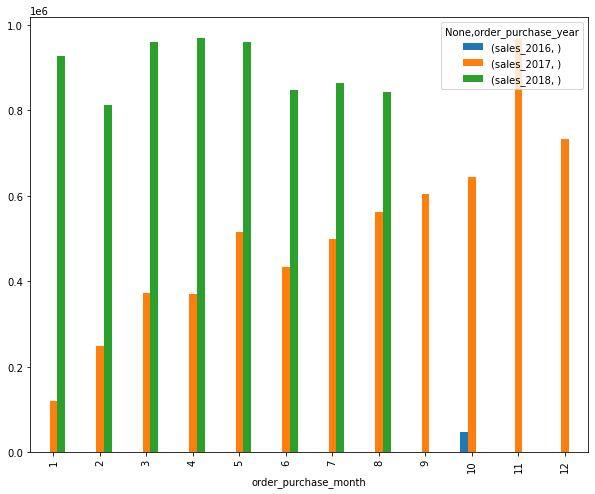

In [522]:
sales_new.plot.bar(figsize=(10, 8))
## By this we can say there is an increasing of sales from 2016 - 2018  


In [523]:
## Product quantity by category 

product_data = final_data_copy.groupby(["order_purchase_year","order_purchase_month","product_category_name"]).agg(Total_product= ("product_category_name","count"))

In [524]:
product_data.reset_index(inplace=True)
product_data

,order_purchase_year,order_purchase_month,product_category_name,Total_product
0,2016,9,Furniture_Decor,2
1,2016,9,Telephony,1
2,2016,10,Air_Conditioning,5
3,2016,10,Audio,2
4,2016,10,Auto,11
...,...,...,...,...
1247,2018,8,Stationery,163
1248,2018,8,Telephony,260
1249,2018,8,Toys,158
1250,2018,8,Watches_Gifts,420


In [525]:
product_new_data = pd.crosstab(product_data.product_category_name, product_data.order_purchase_year,values=product_data.Total_product, aggfunc="sum")

In [526]:
product_new_data[2016]= product_new_data[2016].fillna(0)

In [527]:
product_new_data[2018]=product_new_data[2018].fillna(0)

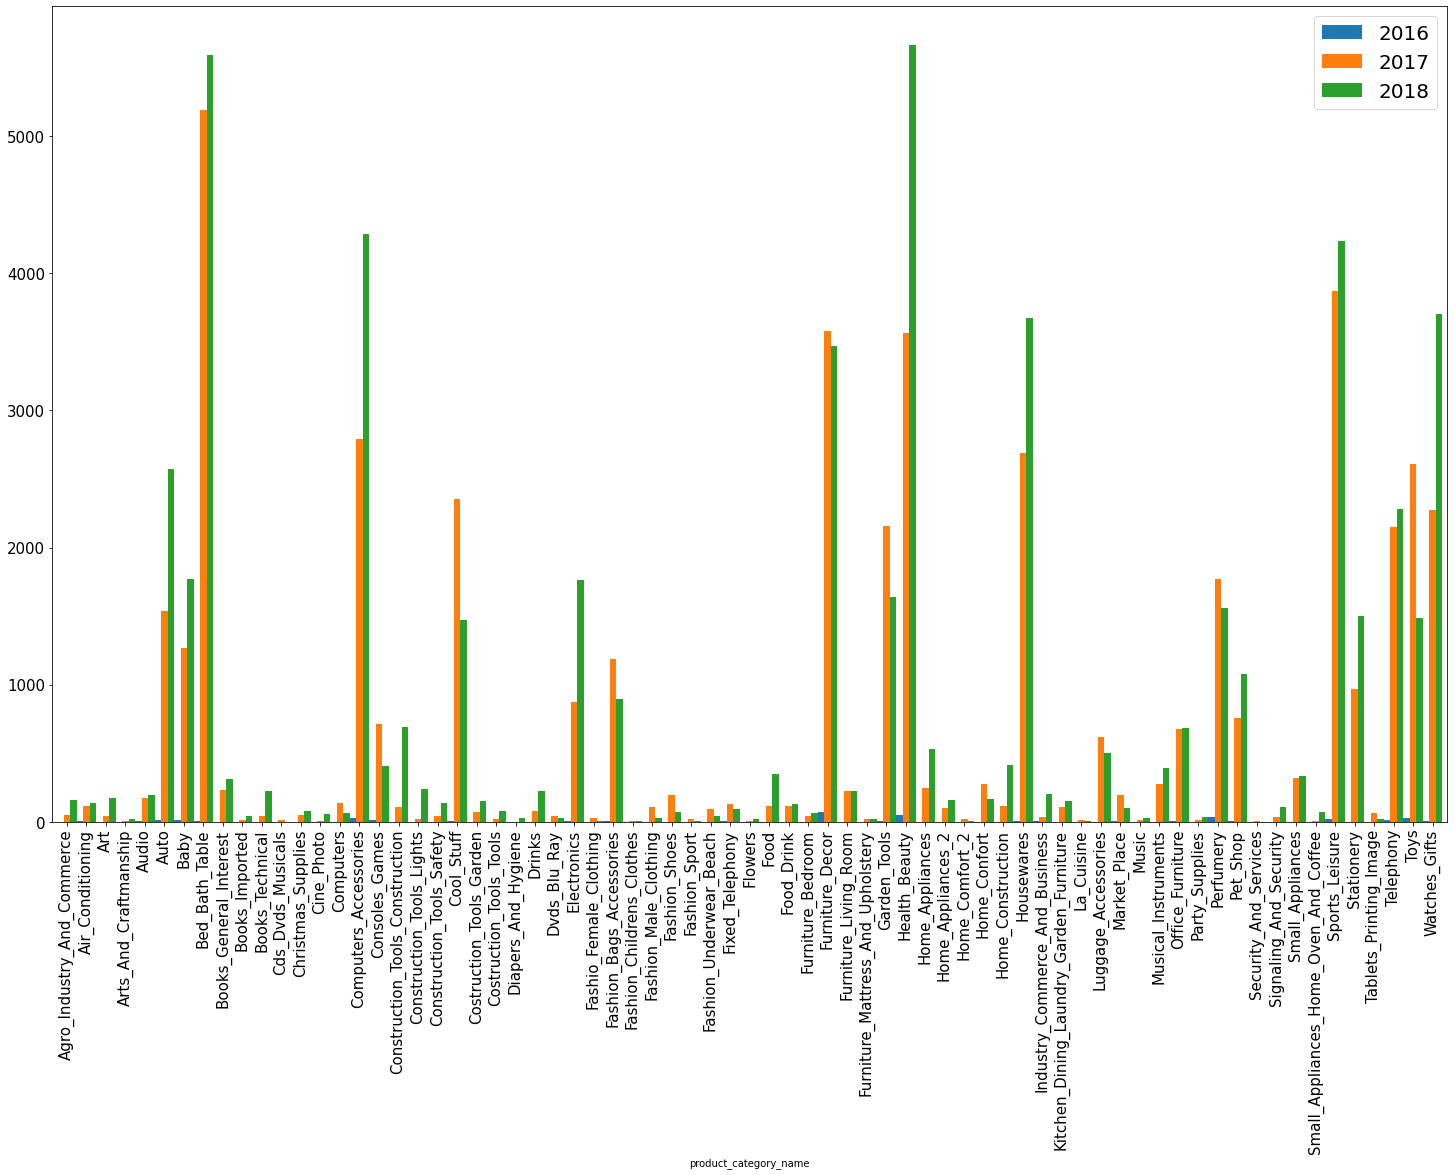

In [528]:
## Consuption of different product on yearly basis 

product_new_data.plot.bar(figsize=(25, 15),width=1,fontsize = 15)
plt.legend(fontsize = 20)



In [529]:
## Spending of customers from different location 
spend_by_location = final_data_copy.groupby(["order_purchase_year","customer_state"]).agg(Total_spend = ("unit_price","sum"))

In [530]:
spend_by_location

Total_spend
order_purchase_year customer_state                
2016                Andhra Pradesh        29495.20
                    Arunachal Pradesh       792.60
                    Chhattisgarh           1999.26
                    Delhi                  1402.36
                    Gujarat                4946.46
                    Haryana                 551.87
                    Himachal Pradesh         36.80
                    Jammu & Kashmir         213.80
                    Karnataka              2136.66
                    Kerala                  742.30
                    Madhya Pradesh          658.17
                    Maharashtra            1306.20
                    Orissa                  430.79
                    Punjab                  141.40
                    Rajasthan               850.80
                    Tamil Nadu             1833.92
                    Uttar Pradesh           224.89
                    West Bengal              90.40
2017                Andhra Pradesh      3517772.35
                    Arunachal Pradesh     75127.50
                    Chhattisgarh         441181.41
                    Delhi                202199.94
                    Goa                     117.30
                    Gujarat              472208.67
                    Haryana              140283.21
                    Himachal Pradesh      51873.01
                    Jammu & Kashmir       97666.68
                    Karnataka            227796.37
                    Kerala                94972.11
                    Madhya Pradesh       197422.03
                    Maharashtra          130906.10
                    Orissa                46598.37
                    Punjab                44106.88
                    Rajasthan             59517.51
                    Tamil Nadu           143773.02
                    Uttar Pradesh         83080.18
                    Uttaranchal            4750.16
                    West Bengal           29945.51
2018                Andhra Pradesh      4329836.20
                    Arunachal Pradesh     79451.85
                    Chhattisgarh         489049.74
                    Delhi                274849.90
                    Goa                     578.61
                    Gujarat              556897.65
                    Haryana              160327.62
                    Himachal Pradesh      46225.50
                    Jammu & Kashmir      104714.41
                    Karnataka            283710.63
                    Kerala               108393.86
                    Madhya Pradesh       202854.89
                    Maharashtra          137058.37
                    Orissa                48590.87
                    Punjab                42790.74
                    Rajasthan             62373.00
                    Tamil Nadu           154154.22
                    Uttar Pradesh         65098.65
                    Uttaranchal            7432.44
                    West Bengal           27919.27

In [531]:
spend_by_location.reset_index(inplace=True)
spend_by_location

,order_purchase_year,customer_state,Total_spend
0,2016,Andhra Pradesh,29495.20
1,2016,Arunachal Pradesh,792.60
2,2016,Chhattisgarh,1999.26
3,2016,Delhi,1402.36
4,2016,Gujarat,4946.46
5,2016,Haryana,551.87
6,2016,Himachal Pradesh,36.80
7,2016,Jammu & Kashmir,213.80
8,2016,Karnataka,2136.66
9,2016,Kerala,742.30


In [532]:
spend_by_state = spend_by_location.pivot_table(values="Total_spend", aggfunc="sum",index="customer_state", columns="order_purchase_year")

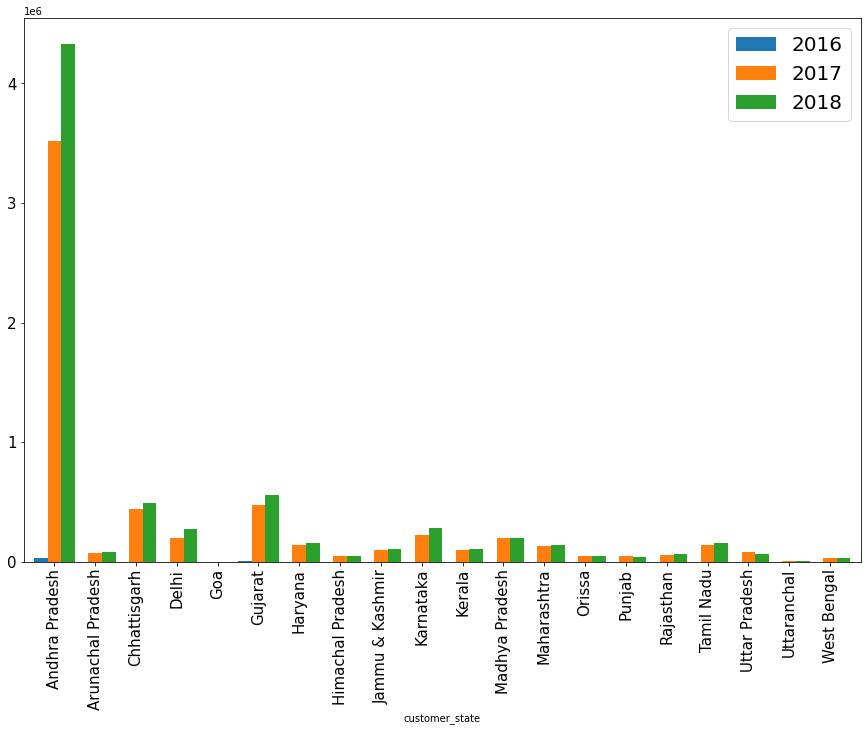

In [533]:
spend_by_state.plot.bar(figsize=(15, 10),width=1,fontsize = 15)
plt.legend(fontsize = 20)
## State wise spending on yearly basis. 

In [534]:
spend_by_city = final_data_copy.groupby(["order_purchase_year","customer_city"]).agg(Total_spend = ("unit_price","sum"))

In [535]:
spend_by_city.reset_index(inplace=True)

In [536]:
spend_by_city  =  spend_by_city.pivot_table(values="Total_spend", aggfunc="sum",index="customer_city", columns="order_purchase_year")

In [537]:
spend_by_city.reset_index(inplace=True) 

In [538]:
spend_by_city[2016] = spend_by_city[2016].fillna(0)

spend_by_city[2017] = spend_by_city[2017].fillna(0)

spend_by_city[2018] = spend_by_city[2018].fillna(0)

In [539]:
## State wise payment methods used by customers 

payment_state = final_data_copy.groupby(["customer_state","payment_type"]).agg(Payment_type = ("payment_type","count"))


In [540]:
payment_state = payment_state.pivot_table(values="Payment_type",aggfunc="sum", index="customer_state",columns="payment_type")

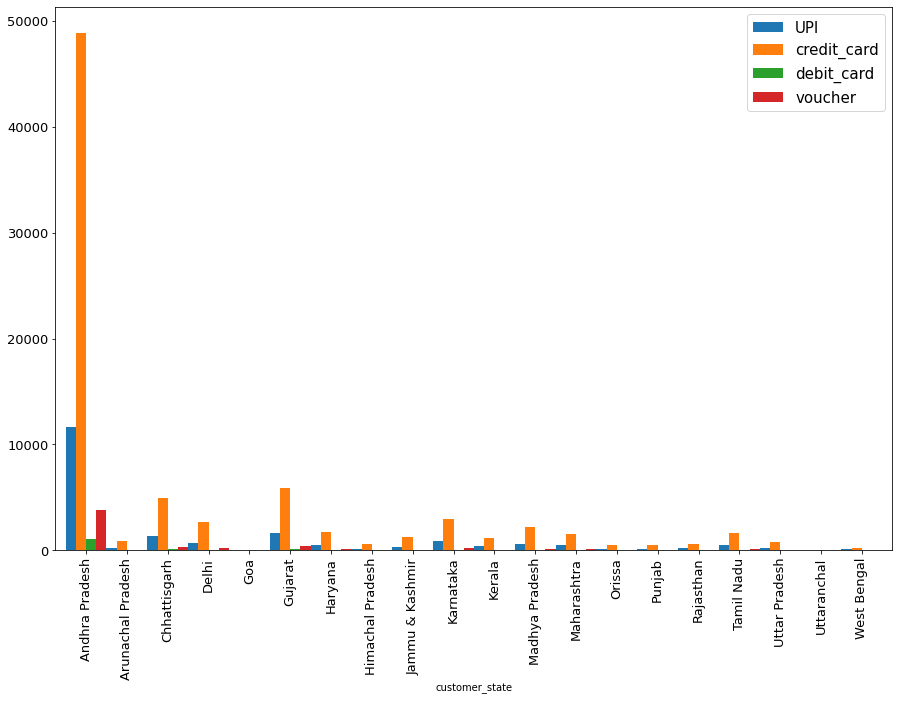

In [541]:
payment_state.plot.bar(figsize=(15, 10),width=1,fontsize = 13)
plt.legend(fontsize = 15)

In [542]:
## States wise review 
review_state = final_data_copy.groupby(["customer_state","review_score"]).agg(N = ("review_score","count"))

In [543]:
review_state.reset_index(inplace=True)
review_state

,customer_state,review_score,N
0,Andhra Pradesh,1,8198
1,Andhra Pradesh,2,2276
2,Andhra Pradesh,3,5376
3,Andhra Pradesh,4,12277
4,Andhra Pradesh,5,37249
...,...,...,...
92,West Bengal,1,42
93,West Bengal,2,16
94,West Bengal,3,29
95,West Bengal,4,93


In [544]:
review_state = review_state.pivot_table(values="N",aggfunc="sum", index="customer_state",columns="review_score")

In [545]:
review_state["Total_customers"] = review_state.sum(axis=1)

In [546]:
review_state["rateing_5_per"]=(review_state[5]/ review_state.Total_customers)

review_state["rateing_1_per"]=(review_state[1]/ review_state.Total_customers)

<AxesSubplot:xlabel='customer_state'>

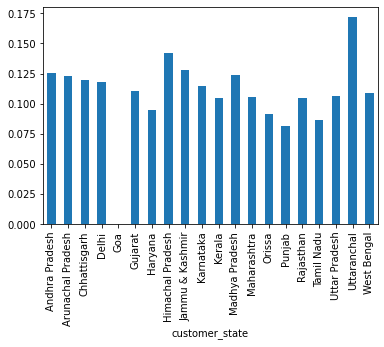

In [547]:
## State-wise Rating of customers-statifaction after buying , the high the value the lowest the rating.

review_state.rateing_1_per.plot.bar()

<AxesSubplot:xlabel='customer_state'>

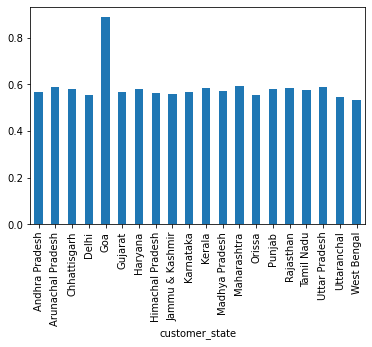

In [548]:
## State-wise Rating of customers-statifaction after buying, the high the value the highest the rating.
review_state.rateing_5_per.plot.bar()

In [549]:
## state wise which product mostly consumes 
state_product = final_data_copy.groupby(["customer_state","product_category_name"]).agg(N = ("product_category_name","count"))

In [550]:
state_product.reset_index(inplace=True)

In [551]:
state_product = state_product.pivot_table(values="N",aggfunc="sum", index="customer_state",columns="product_category_name")

## f. Popular Products by month, seller state, category.

In [552]:
final_data_copy.groupby(["seller_state","order_purchase_month","product_category_name"]).agg(N = ("product_category_name","count"))

N
seller_state   order_purchase_month product_category_name          
Andhra Pradesh 1                    Agro_Industry_And_Commerce   15
                                    Air_Conditioning             12
                                    Art                          19
                                    Audio                        16
                                    Auto                        211
...                                                             ...
West Bengal    12                   Baby                          2
                                    Computers_Accessories        23
                                    Food_Drink                    2
                                    Garden_Tools                 55
                                    Health_Beauty                 1

[3834 rows x 1 columns]

## g. Popular categories by states, month

In [553]:
product_state = final_data_copy.groupby(["customer_state","order_purchase_month","product_category_name"]).agg(N = ("product_category_name","count"))

In [554]:
product_state.reset_index(inplace=True)
product_state

,customer_state,order_purchase_month,product_category_name,N
0,Andhra Pradesh,1,Agro_Industry_And_Commerce,7
1,Andhra Pradesh,1,Air_Conditioning,18
2,Andhra Pradesh,1,Art,15
3,Andhra Pradesh,1,Audio,18
4,Andhra Pradesh,1,Auto,154
...,...,...,...,...
7043,West Bengal,12,Housewares,2
7044,West Bengal,12,Industry_Commerce_And_Business,1
7045,West Bengal,12,Luggage_Accessories,1
7046,West Bengal,12,Musical_Instruments,2


In [555]:
product_state = product_state.pivot_table(values="N",aggfunc="sum" ,index=["customer_state","order_purchase_month"],columns="product_category_name")

In [556]:
product_state.reset_index(inplace=True)

In [557]:
product_state

product_category_name,customer_state,order_purchase_month,Agro_Industry_And_Commerce,Air_Conditioning,Art,Arts_And_Craftmanship,Audio,Auto,Baby,Bed_Bath_Table,...,Security_And_Services,Signaling_And_Security,Small_Appliances,Small_Appliances_Home_Oven_And_Coffee,Sports_Leisure,Stationery,Tablets_Printing_Image,Telephony,Toys,Watches_Gifts
0,Andhra Pradesh,1,7.00,18.00,15.00,NaN,18.00,154.00,164.00,539.00,...,NaN,3.00,39.00,NaN,403.00,219.00,1.00,209.00,127.00,221.00
1,Andhra Pradesh,2,33.00,16.00,9.00,NaN,11.00,217.00,119.00,519.00,...,NaN,6.00,35.00,4.00,454.00,103.00,13.00,263.00,124.00,219.00
2,Andhra Pradesh,3,38.00,29.00,8.00,NaN,29.00,236.00,167.00,673.00,...,NaN,5.00,43.00,7.00,575.00,131.00,6.00,281.00,214.00,302.00
3,Andhra Pradesh,4,6.00,25.00,19.00,1.00,23.00,269.00,163.00,620.00,...,NaN,18.00,61.00,8.00,485.00,120.00,2.00,224.00,198.00,386.00
4,Andhra Pradesh,5,10.00,14.00,26.00,NaN,23.00,226.00,218.00,712.00,...,NaN,5.00,37.00,8.00,483.00,121.00,7.00,243.00,271.00,486.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,West Bengal,8,NaN,NaN,NaN,NaN,1.00,2.00,NaN,4.00,...,NaN,NaN,NaN,NaN,2.00,2.00,NaN,3.00,1.00,3.00
230,West Bengal,9,NaN,NaN,NaN,NaN,NaN,NaN,2.00,1.00,...,NaN,NaN,NaN,NaN,4.00,NaN,NaN,1.00,1.00,NaN
231,West Bengal,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,...,NaN,NaN,NaN,NaN,1.00,NaN,NaN,3.00,NaN,NaN
232,West Bengal,11,NaN,NaN,NaN,NaN,NaN,2.00,1.00,1.00,...,NaN,NaN,1.00,NaN,2.00,NaN,NaN,5.00,1.00,1.00


## h. List top 10 most expensive products sorted by price

In [558]:
product_price =  final_data_copy.iloc[final_data_copy.product_category_name.drop_duplicates().index]

In [559]:
product_price_final = product_price[["product_category_name","unit_price"]]
product_price_final = product_price_final.sort_values(by="unit_price", ascending=False)


In [560]:
product_price_final.reset_index(inplace=True)
product_price_final.drop("index" ,axis=1, inplace= True)

In [561]:
product_price_final.head(10)

,product_category_name,unit_price
0,Telephony,879.33
1,Garden_Tools,530.00
2,Watches_Gifts,355.90
3,Perfumery,339.00
4,Housewares,265.00
5,Cool_Stuff,259.99
6,Industry_Commerce_And_Business,229.80
7,Toys,199.99
8,Watches_Gifts,199.99
9,Construction_Tools_Lights,199.90


## 2. Performing Customers/sellers Segmentation 
## a. Divide the customers into groups based on the revenue generated

In [562]:
customer_sales = final_data.groupby(["customer_id" ]).agg(sales = ("unit_price", "sum"))

In [563]:
customer_sales.reset_index(inplace=True)

In [564]:
customer_sales.sales.quantile(q=[.2,.4,.6,.8])

0.20    37.80
0.40    63.99
0.60    99.99
0.80   169.90
Name: sales, dtype: float64

In [565]:
## below 38  --> very low ---->  0
## 39-64    -----> low -------> 1
## 65-100 ---------> medium -------> 2
## 100 above -----> high --------> 3

In [566]:
customer_sales["sales_as_category"]= np.where(customer_sales.sales< 38 , 0, np.where(((customer_sales.sales>38)&(customer_sales.sales<64)),1,np.where(((customer_sales.sales>64)&(customer_sales.sales<100)),2,3)))

In [567]:
customer_sales

,customer_id,sales,sales_as_category
0,00012a2ce6f8dcda20d059ce98491703,89.80,2
1,000161a058600d5901f007fab4c27140,54.90,1
2,0001fd6190edaaf884bcaf3d49edf079,179.99,3
3,0002414f95344307404f0ace7a26f1d5,149.90,3
4,000379cdec625522490c315e70c7a9fb,93.00,2
...,...,...,...
98386,fffcb937e9dd47a13f05ecb8290f4d3e,78.00,2
98387,fffecc9f79fd8c764f843e9951b11341,164.70,3
98388,fffeda5b6d849fbd39689bb92087f431,47.90,1
98389,ffff42319e9b2d713724ae527742af25,199.90,3


## b. Divide the sellers into groups based on the revenue generated

In [568]:
seller_sales = final_data.groupby(["seller_id" ]).agg(sales = ("unit_price", "sum"))

In [569]:
seller_sales.reset_index(inplace=True)

In [570]:
seller_sales.sales.quantile(q=[.2,.4,.6,.8])

0.20    149.70
0.40    452.30
0.60   1292.80
0.80   4374.77
Name: sales, dtype: float64

In [571]:
## below 150  --> very low ---->  0
## 151-452    -----> low -------> 1
## 453-1293 ---------> medium -------> 2
## 1293 above -----> high --------> 3

In [572]:
seller_sales["sales_as_category"]= np.where(seller_sales.sales<150,0,np.where(((seller_sales.sales>150)&(seller_sales.sales<452)),1,np.where(((seller_sales.sales>452)&(seller_sales.sales<1293)),2,3)))

In [573]:
seller_sales

,seller_id,sales,sales_as_category
0,0015a82c2db000af6aaaf3ae2ecb0532,2685.00,3
1,001cca7ae9ae17fb1caed9dfb1094831,21312.34,3
2,001e6ad469a905060d959994f1b41e4f,250.00,1
3,002100f778ceb8431b7a1020ff7ab48f,1283.20,2
4,003554e2dce176b5555353e4f3555ac8,120.00,0
...,...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,69.90,0
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,1863.20,3
3092,ffeee66ac5d5a62fe688b9d26f83f534,1839.86,3
3093,fffd5413c0700ac820c7069d66d98c89,9186.00,3


## 3. Cross-Selling (Which products are selling together) Hint: We need to find which of the top 10 combinations of products are selling together in each transaction. (combination of 2 or 3 buying together)

In [574]:
final_data_dup= final_data_copy.groupby(["customer_id","product_category_name"]).agg(N = ("product_category_name","count"))

In [575]:
final_data_dup.reset_index(inplace=True)

In [576]:
final_data_dup.N.value_counts() 

1     92372
2      4427
3       505
4       218
5        58
6        58
7        30
8        13
12        9
11        8
9         8
10        5
13        2
14        2
15        2
19        2
21        2
18        1
20        1
22        1
26        1
29        1
Name: N, dtype: int64

In [577]:
final_data_dup= final_data_dup[final_data_dup.N == 2 ]


In [578]:
final_data_dup.product_category_name.value_counts()

Bed_Bath_Table                           759
Furniture_Decor                          355
Computers_Accessories                    299
Health_Beauty                            296
Sports_Leisure                           275
                                        ... 
Furniture_Bedroom                          1
Small_Appliances_Home_Oven_And_Coffee      1
Fashio_Female_Clothing                     1
Arts_And_Craftmanship                      1
Home_Comfort_2                             1
Name: product_category_name, Length: 64, dtype: int64

In [579]:
## Bed_Bath_Table is most frequently buy in two combination 

## 4. Payment Behaviour
### a. How customers are paying?

In [580]:
## customers are paying through credit_card method

## b. Which payment channels are used by most customers?

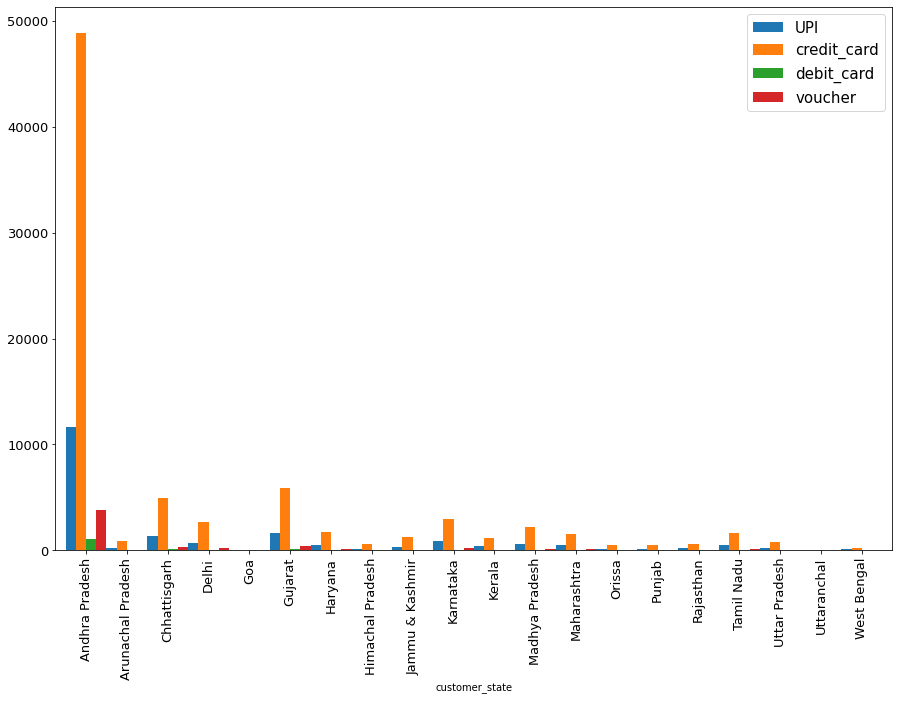

In [581]:
payment_state.plot.bar(figsize=(15, 10),width=1,fontsize = 13)
plt.legend(fontsize = 15)

## most of the customers are chosen credit_card method 

## 5. Customer satisfaction towards category & product

### Which categories (top 10) are maximum rated & minimum rated?

In [591]:
customer_final_copy = customer_final.copy()

In [592]:
final_data_product_score = customer_final_copy[["customer_id","product_category_name","review_score"]]

In [593]:
final_data_product_score

,customer_id,product_category_name,review_score
0,9ef432eb6251297304e76186b10a928d,Housewares,4
1,9ef432eb6251297304e76186b10a928d,Housewares,4
2,9ef432eb6251297304e76186b10a928d,Housewares,4
3,a20e8105f23924cd00833fd87daa0831,Housewares,4
4,26c7ac168e1433912a51b924fbd34d34,Housewares,5
...,...,...,...
106727,a0b67404d84a70ef420a7f99ad6b190a,Construction_Tools_Lights,5
106728,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,Auto,1
106729,d531d01affc2c55769f6b9ed410d8d3c,Furniture_Decor,5
106730,9d8c06734fde9823ace11a4b5929b5a7,Furniture_Decor,4


In [594]:
final_data_product_score.sort_values(by="review_score", ascending=False, inplace=True )

<ipython-input-594-5599ae16c5a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data_product_score.sort_values(by="review_score", ascending=False, inplace=True )


In [595]:
product_review = pd.crosstab(final_data_product_score.product_category_name,final_data_product_score.review_score )

In [596]:
product_review

review_score,1,2,3,4,5
product_category_name,,,,,
Agro_Industry_And_Commerce,21,6,14,50,121
Air_Conditioning,38,7,20,48,145
Art,28,7,20,39,118
Arts_And_Craftmanship,3,0,3,3,15
Audio,61,19,36,53,196
...,...,...,...,...,...
Stationery,223,78,160,489,1519
Tablets_Printing_Image,6,6,7,21,43
Telephony,547,177,444,963,2310


In [597]:
product_review["total"]= product_review.sum(axis=1)

In [598]:
product_review["rate_1_per"]= (product_review[1]/product_review.total)
product_review["rate_2_per"]= (product_review[2]/product_review.total)
product_review["rate_3_per"]= (product_review[3]/product_review.total)
product_review["rate_4_per"]= (product_review[4]/product_review.total)
product_review["rate_5_per"]= (product_review[5]/product_review.total)

In [599]:
product_review.drop({1,2,3,4,5},axis=1, inplace=True)
product_review.drop({'total'},axis=1, inplace=True)

In [600]:
product_review.sort_values(by="rate_5_per", ascending= False, inplace=True)

In [601]:
## categories (top 10) are maximum rated
product_review.head(10).index

## 'Fashion_Childrens_Clothes', 'Books_Imported', 'Cds_Dvds_Musicals','La_Cuisine', 'Books_General_Interest', 
## 'Books_Technical', 'Cine_Photo','Costruction_Tools_Tools', 'Small_Appliances_Home_Oven_And_Coffee','Flowers'

Index(['Fashion_Childrens_Clothes', 'Books_Imported', 'Cds_Dvds_Musicals',
       'La_Cuisine', 'Books_General_Interest', 'Books_Technical', 'Cine_Photo',
       'Costruction_Tools_Tools', 'Small_Appliances_Home_Oven_And_Coffee',
       'Flowers'],
      dtype='object', name='product_category_name')

In [602]:
product_review.sort_values(by="rate_1_per", ascending=False, inplace=True)

In [603]:
## categories (top 10) are minmum rated
product_review.head(10).index


## 'Security_And_Services', 'Fashion_Male_Clothing', 'La_Cuisine','Home_Comfort_2', 'Diapers_And_Hygiene', 'Office_Furniture',
## 'Construction_Tools_Safety', 'Furniture_Bedroom','Furniture_Mattress_And_Upholstery', 'Audio'

Index(['Security_And_Services', 'Fashion_Male_Clothing', 'La_Cuisine',
       'Home_Comfort_2', 'Diapers_And_Hygiene', 'Office_Furniture',
       'Construction_Tools_Safety', 'Furniture_Bedroom',
       'Furniture_Mattress_And_Upholstery', 'Audio'],
      dtype='object', name='product_category_name')